# Merge ranking files 



In [9]:
import os
import pandas as pd

In [10]:
# filenames
house_school_rank_file = os.path.join("Results","house_afford_school_ranking.csv")
city_demographic_file = os.path.join("Results","Cities_Demographics_Scores.csv")

In [11]:
housing_school_rank = pd.read_csv(house_school_rank_file)
demographic_rank = pd.read_csv(city_demographic_file)

In [12]:
housing_school_rank

,City,own,rent,schools,college
0,Raleigh,8,8,3,8
1,Austin,7,7,7,3
2,Washington DC,6,6,5,2
3,Atlanta,5,4,6,6
4,Chicago,4,5,2,1
5,New York,3,2,4,5
6,Boston,2,3,1,4
7,Los Angeles,1,1,8,7


In [13]:
demographic_rank

,Unnamed: 0,NAME,City,TechPool_Score,EduAtt_Score,Crime_Score,Diversity_Score
0,0,"Washington city, District of Columbia",Washington DC,8,8,2,4
1,1,"New York city, New York",New York,2,1,8,8
2,2,"Boston city, Massachusetts",Boston,5,4,6,3
3,3,"Chicago city, Illinois",Chicago,3,3,3,6
4,4,"Los Angeles city, California",Los Angeles,1,2,4,7
5,5,"Raleigh city, North Carolina",Raleigh,6,6,7,2
6,6,"Austin city, Texas",Austin,4,7,5,5
7,7,"Atlanta city, Georgia",Atlanta,7,5,1,1


In [18]:
# INSERT HERE other ranking files 
demographic_rank = demographic_rank.drop(['Unnamed: 0','NAME'], axis=1)

In [19]:
# combine ranking into one file
combined_rank = pd.merge(housing_school_rank,
                         demographic_rank,
                         on='City')


In [20]:
#INSERT HERE
# repeat merging (above cell) with additional csv that have been read
# sample combined_rank = combined_rank.merge(other_rank, on='City')
combined_rank

,City,own,rent,schools,college,TechPool_Score,EduAtt_Score,Crime_Score,Diversity_Score
0,Raleigh,8,8,3,8,6,6,7,2
1,Austin,7,7,7,3,4,7,5,5
2,Washington DC,6,6,5,2,8,8,2,4
3,Atlanta,5,4,6,6,7,5,1,1
4,Chicago,4,5,2,1,3,3,3,6
5,New York,3,2,4,5,2,1,8,8
6,Boston,2,3,1,4,5,4,6,3
7,Los Angeles,1,1,8,7,1,2,4,7


In [21]:
c = combined_rank.set_index("City")
c

,own,rent,schools,college,TechPool_Score,EduAtt_Score,Crime_Score,Diversity_Score
City,,,,,,,,
Raleigh,8,8,3,8,6,6,7,2
Austin,7,7,7,3,4,7,5,5
Washington DC,6,6,5,2,8,8,2,4
Atlanta,5,4,6,6,7,5,1,1
Chicago,4,5,2,1,3,3,3,6
New York,3,2,4,5,2,1,8,8
Boston,2,3,1,4,5,4,6,3
Los Angeles,1,1,8,7,1,2,4,7


In [22]:
## Write to CSV fike the combined rank

combined_rank_file = os.path.join("Results","demographics_house_afford_school_ranking.csv")
c.to_csv(combined_rank_file)

# SAMPLE  Visualize Combined Ranking

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
# read input from CSV
c = pd.read_csv(combined_rank_file)
c

,City,own,rent,schools,college,TechPool_Score,EduAtt_Score,Crime_Score,Diversity_Score
0,Raleigh,8,8,3,8,6,6,7,2
1,Austin,7,7,7,3,4,7,5,5
2,Washington DC,6,6,5,2,8,8,2,4
3,Atlanta,5,4,6,6,7,5,1,1
4,Chicago,4,5,2,1,3,3,3,6
5,New York,3,2,4,5,2,1,8,8
6,Boston,2,3,1,4,5,4,6,3
7,Los Angeles,1,1,8,7,1,2,4,7


In [25]:
# make the city the index
c = c.set_index('City')

In [26]:
# ensure valus are integers and not strings
c = c.apply(pd.to_numeric)

In [27]:
c

,own,rent,schools,college,TechPool_Score,EduAtt_Score,Crime_Score,Diversity_Score
City,,,,,,,,
Raleigh,8,8,3,8,6,6,7,2
Austin,7,7,7,3,4,7,5,5
Washington DC,6,6,5,2,8,8,2,4
Atlanta,5,4,6,6,7,5,1,1
Chicago,4,5,2,1,3,3,3,6
New York,3,2,4,5,2,1,8,8
Boston,2,3,1,4,5,4,6,3
Los Angeles,1,1,8,7,1,2,4,7


In [28]:
# prefix all column names with same string
for col in c.columns: 
    c=c.rename(columns={col:'rating_'+col})
c    

,rating_own,rating_rent,rating_schools,rating_college,rating_TechPool_Score,rating_EduAtt_Score,rating_Crime_Score,rating_Diversity_Score
City,,,,,,,,
Raleigh,8,8,3,8,6,6,7,2
Austin,7,7,7,3,4,7,5,5
Washington DC,6,6,5,2,8,8,2,4
Atlanta,5,4,6,6,7,5,1,1
Chicago,4,5,2,1,3,3,3,6
New York,3,2,4,5,2,1,8,8
Boston,2,3,1,4,5,4,6,3
Los Angeles,1,1,8,7,1,2,4,7


In [29]:
# prepare for visual
c = c.reset_index()
c = c.melt('City', var_name='rating', value_name='vals')


In [30]:
g = sns.factorplot(kind='bar',x="vals", y='City',hue='rating', data=c, size=10)

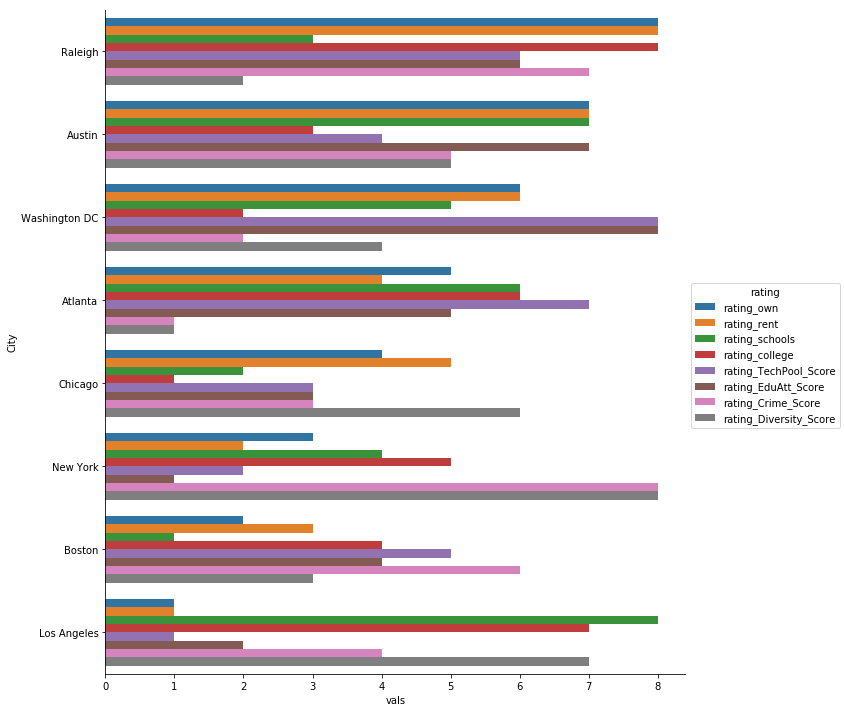

In [31]:
combined_ranking_visual = os.path.join("Plots","combined_ranking_visual.png")
plt.savefig(combined_ranking_visual)
plt.show()

# Combined final ranking

addig the rank values for each city to get a final ranking

In [32]:
# Read combined ranking dataframe
combined_rank_file = os.path.join("Results","demographics_house_afford_school_ranking.csv")
c = pd.read_csv(combined_rank_file)
c = combined_rank.set_index("City")

In [33]:
# ensure all values are integers, note the City is intentionally the index so that it does not 
# attempt to convert a city name into integer
c= c.apply(pd.to_numeric)

In [34]:
# get names for all the rankings
columns = c.columns
columns

Index(['own', 'rent', 'schools', 'college', 'TechPool_Score', 'EduAtt_Score',
       'Crime_Score', 'Diversity_Score'],
      dtype='object')

In [35]:
c

,own,rent,schools,college,TechPool_Score,EduAtt_Score,Crime_Score,Diversity_Score
City,,,,,,,,
Raleigh,8,8,3,8,6,6,7,2
Austin,7,7,7,3,4,7,5,5
Washington DC,6,6,5,2,8,8,2,4
Atlanta,5,4,6,6,7,5,1,1
Chicago,4,5,2,1,3,3,3,6
New York,3,2,4,5,2,1,8,8
Boston,2,3,1,4,5,4,6,3
Los Angeles,1,1,8,7,1,2,4,7


In [36]:
# Compute totals for each city

c['total']=0
for col in columns:
    c['total']=c['total']+c[col]
c    

,own,rent,schools,college,TechPool_Score,EduAtt_Score,Crime_Score,Diversity_Score,total
City,,,,,,,,,
Raleigh,8,8,3,8,6,6,7,2,48
Austin,7,7,7,3,4,7,5,5,45
Washington DC,6,6,5,2,8,8,2,4,41
Atlanta,5,4,6,6,7,5,1,1,35
Chicago,4,5,2,1,3,3,3,6,27
New York,3,2,4,5,2,1,8,8,33
Boston,2,3,1,4,5,4,6,3,28
Los Angeles,1,1,8,7,1,2,4,7,31


In [37]:
# Drop all columns, only need the totals
total = c[['total']]
total = total.sort_values('total', ascending=False)
total = total.reset_index()

In [38]:
total

,City,total
0,Raleigh,48
1,Austin,45
2,Washington DC,41
3,Atlanta,35
4,New York,33
5,Los Angeles,31
6,Boston,28
7,Chicago,27


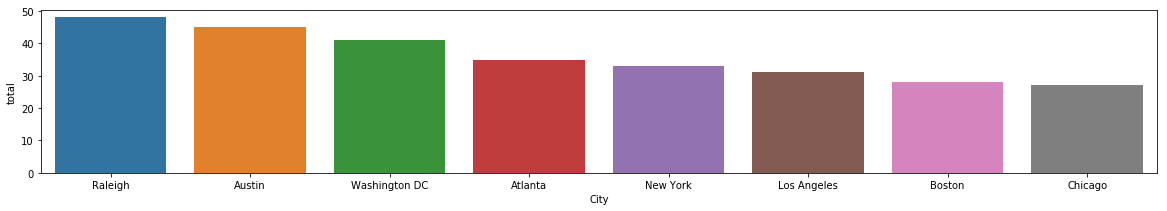

In [39]:
# plot the results
plt.figure(figsize=(20,3))
sns.barplot(x='City',y='total',data=total)
combined_ranking_visual = os.path.join("Plots","combined_total_ranking_visual.png")
plt.savefig(combined_ranking_visual)
plt.show()